## 新能源电动汽车动力电池充电能量预测（五）——模型训练

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from datetime import date, datetime
from package import utils
import time

### 导入数据

In [2]:
# 导入经过填充之后的数据集合
dataset = pd.read_csv('./energy_predict_data/data_prehandle/4_fill_null/whole/filled_by_kmeans/predict_data_e_train.csv')
# 数据字段
header = dataset.columns.values.tolist()
# 数据集大小
count = np.max(dataset['vehicle_id'])
# 数据描述
pd.set_option('precision', 2)
dataset.describe()

,vehicle_id,charge_start_time,charge_end_time,charge_duration,mileage,delta_mileage,charge_start_soc,charge_end_soc,charge_delta_soc,charge_start_U,charge_end_U,charge_start_I,charge_end_I,charge_max_temp,charge_min_temp,charge_delta_temp,charge_energy
count,5990.00,5.99e+03,5.99e+03,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5990.00,5980.00,5990.00,5980.00,5990.00,5990.00,5990.00,5990.00
mean,11.37,2.02e+13,2.02e+13,7178.32,103588.11,102.27,35.57,76.56,40.99,405.94,436.13,-43.74,-22.32,27.19,15.18,12.04,25.94
std,6.45,4.00e+09,4.00e+09,8366.48,30819.13,64.72,19.37,26.82,22.35,91.53,87.88,48.22,35.36,10.62,11.55,9.95,21.24
min,1.00,2.02e+13,2.02e+13,600.00,45631.70,0.00,0.00,4.80,0.00,252.30,0.00,-202.00,-400.00,-2.00,-7.00,0.00,0.22
25%,5.00,2.02e+13,2.02e+13,2168.25,78704.15,63.10,20.80,55.25,22.40,340.40,374.60,-59.80,-20.40,18.00,5.00,6.00,12.64
50%,11.00,2.02e+13,2.02e+13,3861.00,97276.05,93.25,34.00,87.00,40.00,361.50,391.60,-24.00,-9.30,30.00,14.00,9.00,19.61
75%,17.00,2.02e+13,2.02e+13,6429.00,122780.75,132.78,47.00,100.00,61.00,533.70,551.70,-9.00,-5.00,35.00,25.00,12.00,29.56
max,21.00,2.02e+13,2.02e+13,59960.00,182536.00,490.00,96.00,110.49,99.00,574.60,604.70,-0.10,8.00,52.00,46.00,51.00,103.72


In [3]:
dataset.isnull().sum()

vehicle_id            0
charge_start_time     0
charge_end_time       0
charge_duration       0
mileage               0
delta_mileage         0
charge_start_soc      0
charge_end_soc        0
charge_delta_soc      0
charge_start_U        0
charge_end_U         10
charge_start_I        0
charge_end_I         10
charge_max_temp       0
charge_min_temp       0
charge_delta_temp     0
charge_energy         0
dtype: int64

### 特征选取

In [4]:
features = ['charge_duration', 
            'delta_mileage',
            'charge_start_soc', 
            'charge_delta_soc', 
            'charge_end_soc',
            'charge_start_U',
            'charge_start_I',
            'charge_delta_temp']
label = header[16]
features, label

(['charge_duration',
  'delta_mileage',
  'charge_start_soc',
  'charge_delta_soc',
  'charge_end_soc',
  'charge_start_U',
  'charge_start_I',
  'charge_delta_temp'],
 'charge_energy')

### 构造特征集合和输出集合

In [5]:
X = dataset[features]
y = dataset[label]

### 创建训练后的预测值数据集

In [6]:
type = 3
data_proced = pd.DataFrame()
data_proced['id'] = dataset.index
data_proced['type'] = 3 # 使用填充值,并且进行标准化

### 划分训练集和测试集

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)##训练集划分

### 标准化

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train.astype(np.float64))
X_test = scaler.fit_transform(X_test.astype(np.float64))
X = scaler.fit_transform(X.astype(np.float64))

### 特征选择

In [9]:
#导入sklearn库中的VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
#设置方差的阈值为0.08
sel = VarianceThreshold(threshold=0.08)
#选择方差大于0.08的特征
X_sel = sel.fit_transform(X_train.astype(np.float64))

### 训练模型

#### 线性回归模型（lr）

Running time: 0.0789679999999997 Seconds
MSE: 54.4312272789
RMSE: 7.37775218335
MAE: 5.31046833228
ER: 0.536517718509
RANK: 84.258287004
R2: 0.879412967273


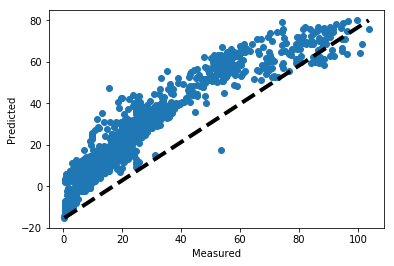

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# 训练
#记录训练开始时间
time_start=time.clock()
linreg.fit(X_train, y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
# y_pred = linreg.predict(X) 
y_pred = linreg.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [11]:
# pred = linreg.predict(X)
# data_proced['lr'] = y_pred

#### 多项式回归模型（plr）

Running time: 0.07833900000000016 Seconds
MSE: 9.73427766376e+15
RMSE: 98662443.0255
MAE: 90459465.6373
ER: 11534841.0441
RANK: 1338326909.24
R2: -2.15653351558e+13


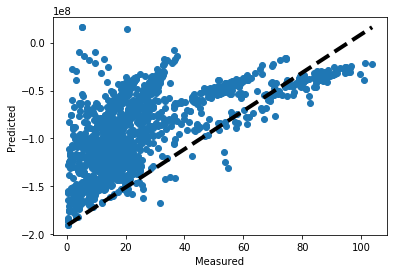

In [12]:
from sklearn.preprocessing import PolynomialFeatures
featurizer = PolynomialFeatures(degree=3)
X_train_cubic = featurizer.fit_transform(X_train)
linreg = LinearRegression()
# 训练
#记录训练开始时间
time_start=time.clock()
linreg.fit(X_train_cubic, y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
X_test_cubic = featurizer.transform(X_test)
y_pred = linreg.predict(X_test_cubic)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [13]:
# y_pred = linreg.predict(featurizer.fit_transform(X))
# data_proced['plr'] = y_pred

#### SVR_linear

Running time: 0.6181229999999998 Seconds
MSE: 65.0967736923
RMSE: 8.06825716573
MAE: 4.90963141709
ER: 0.35918870637
RANK: 42.4192702316
R2: 0.855784497759


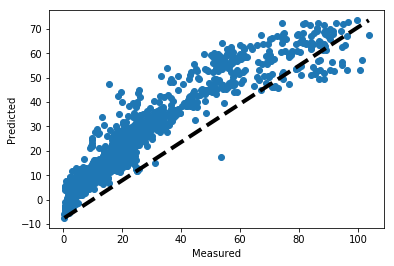

In [14]:
import time
from sklearn.svm import SVR
l_svr=SVR(kernel='linear')
# 训练
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

# 预测
y_pred = l_svr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [15]:
# y_pred = l_svr.predict(X)
# data_proced['svr_lr'] = y_pred

####  SVR_poly

Running time: 0.6240170000000003 Seconds
MSE: 167.004648895
RMSE: 12.9230278532
MAE: 7.94880416335
ER: 0.717586209449
RANK: 87.3526597249
R2: 0.63001761914


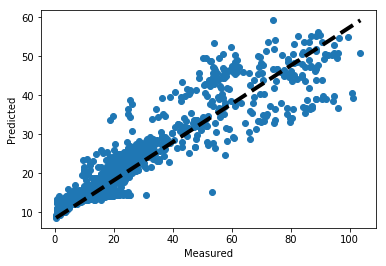

In [16]:
l_svr=SVR(kernel='poly')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [17]:
# y_pred = n_svr.predict(X)
# data_proced['svr_plr'] = y_pred

#### SVR_rbf

Running time: 0.8004429999999996 Seconds
MSE: 66.9366674267
RMSE: 8.18148320457
MAE: 4.77145103997
ER: 0.283537575589
RANK: 28.1253000096
R2: 0.851708394076


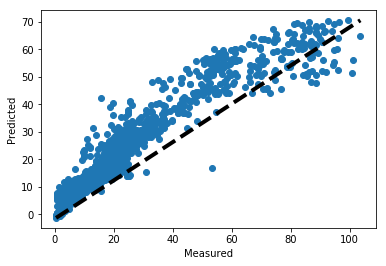

In [18]:
l_svr=SVR(kernel='rbf')
#记录训练开始时间
time_start=time.clock()
l_svr.fit(X_train,y_train)
#记录训练结束时间
time_end=time.clock()
print('Running time: %s Seconds'%(time_end-time_start))

#返回预测性能得分，值不超过1，值越大性能越好
y_pred = l_svr.predict(X_test)

#评估模型
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [19]:
# y_pred=l_svr.predict(X)
# data_proced['svr_rbf'] = y_pred

###  决策树回归（dtr）

Running time: 0.028843999999999426 Seconds
MSE: 12.8631286607
RMSE: 3.5865204113
MAE: 1.93020422602
ER: 0.107677593394
RANK: 8.8238754019
R2: 0.971503003068


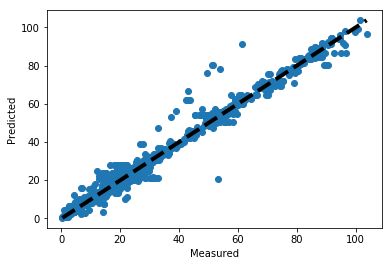

In [20]:
import time
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
dt.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = dt.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [21]:
# y_pred = dt.predict(X)
# data_proced['dtr'] = y_pred

### 极端森林（etr）

Running time: 0.09496700000000047 Seconds
MSE: 7.29482471734
RMSE: 2.70089331839
MAE: 1.47384551327
ER: 0.0813946861894
RANK: 6.16541715993
R2: 0.983839033017


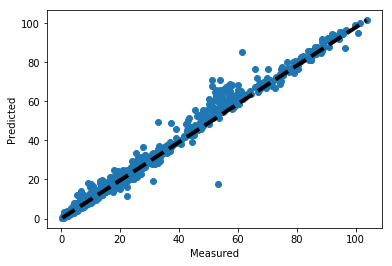

In [22]:
import time
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
etr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = etr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [23]:
# y_pred = etr.predict(X)
# data_proced['etr'] = y_pred

### 随机森林（rtr）

Running time: 0.20961999999999925 Seconds
MSE: 9.28685403676
RMSE: 3.0474340086
MAE: 1.6523698849
ER: 0.0976698943044
RANK: 7.39253435341
R2: 0.979425887902


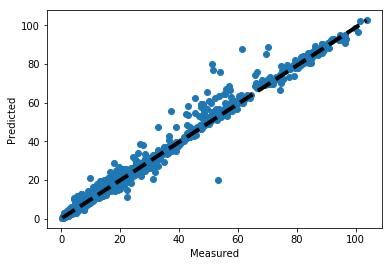

In [24]:
import time
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
rfr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = rfr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [25]:
# y_pred = rfr.predict(X)
# data_proced['rtr'] = y_pred

### 自适应增强决策树模型（abr）

Running time: 0.3565529999999999 Seconds
MSE: 25.9182028663
RMSE: 5.09099232629
MAE: 4.09043885692
ER: 0.542768815276
RANK: 74.6927927419
R2: 0.942580769652


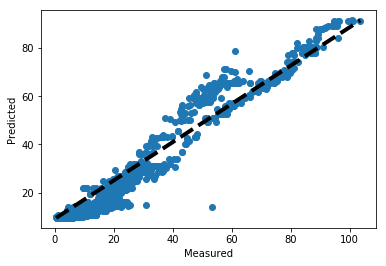

In [26]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
abr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = abr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [27]:
# y_pred = abr.predict(X)
# data_proced['abr'] = y_pred

### BaggingRegressor（br）

Running time: 0.22027199999999958 Seconds
MSE: 10.5488095887
RMSE: 3.24789309995
MAE: 1.68246003953
ER: 0.0928079736553
RANK: 6.5872661202
R2: 0.976630149444


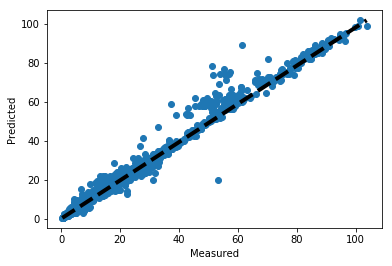

In [28]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
br.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = br.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [29]:
# y_pred = br.predict(X)
# data_proced['br'] = y_pred

### GradientBoostingRegressor（gbr）

Running time: 0.21509799999999935 Seconds
MSE: 13.2884737477
RMSE: 3.64533588956
MAE: 2.0121747556
ER: 0.11887122771
RANK: 9.01461441513
R2: 0.970560692845


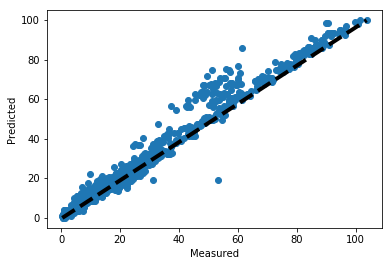

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
gbr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = gbr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [31]:
# y_pred = gbr.predict(X)
# data_proced['gbr'] = y_pred

###  XGBRegressor

/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Running time: 0.13973700000000022 Seconds
MSE: 13.1978566422
RMSE: 3.63288544304
MAE: 1.98504876764
ER: 0.117521802002
RANK: 9.1443556946
R2: 0.970761446133


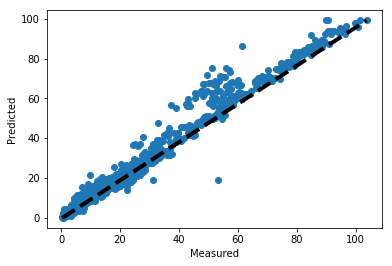

In [32]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
# 训练
#记录训练开始时间
time_start = time.clock()
xgbr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = xgbr.predict(X_test)

#评估模型
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [33]:
# y_pred = xgbr.predict(X)
# data_proced['xgbr'] = y_pred

### MLPRegressor

Running time: 2.5845909999999996 Seconds
MSE: 9.52493604742
RMSE: 3.08624951153
MAE: 2.12764698166
ER: 0.158482502187
RANK: 19.2969030184
R2: 0.978898440614


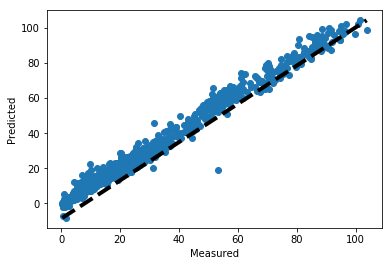

In [34]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(solver='lbfgs')
# 训练
#记录训练开始时间
time_start = time.clock()
mlpr.fit(X_train,y_train)
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
y_pred = mlpr.predict(X_test)

#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [35]:
# y_pred = mlpr.predict(X)
# data_proced['mlpr'] = y_pred

### BP神经网络

Using TensorFlow backend.
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(24, input_dim=8, kernel_initializer="uniform")`
  """
/Users/Jeremy/miniconda3/envs/test/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
4492/4492 [==============================] - 0s 73us/step - loss: 124.7158
Epoch 2/1000
4492/4492 [==============================] - 0s 51us/step - loss: 47.7036
Epoch 3/1000
4492/4492 [==============================] - 0s 48us/step - loss: 44.2263
Epoch 4/1000
4492/4492 [==============================] - 0s 50us/step - loss: 35.1956
Epoch 5/1000
4492/4492 [==============================] - 0s 45us/step - loss: 44.9300
Epoch 6/1000
4492/4492 [==============================] - 0s 53us/step - loss: 38.3238
Epoch 7/1000
4492/4492 [==============================] - 0s 59us/step - loss: 33.9369
Epoch 8/1000
4492/4492 [==============================] - 0s 55us/step - loss: 28.2669
Epoch 9/1000
4492/4492 [==============================] - 0s 53us/step - loss: 28.1286
Epoch 10/1000
4492/4492 [==============================] - 0s 49us/step - loss: 25.9157
Epoch 11/1000
4492/4492 [==============================] - 0s 49us/step - loss: 24.6656
Epoch 12/1000
4492/4492 [===============

4492/4492 [==============================] - 0s 45us/step - loss: 13.6460
Epoch 94/1000
4492/4492 [==============================] - 0s 45us/step - loss: 14.8609
Epoch 95/1000
4492/4492 [==============================] - 0s 50us/step - loss: 12.6788
Epoch 96/1000
4492/4492 [==============================] - 0s 47us/step - loss: 16.9065
Epoch 97/1000
4492/4492 [==============================] - 0s 44us/step - loss: 15.5608
Epoch 98/1000
4492/4492 [==============================] - 0s 47us/step - loss: 14.1345
Epoch 99/1000
4492/4492 [==============================] - 0s 45us/step - loss: 13.0163
Epoch 100/1000
4492/4492 [==============================] - 0s 45us/step - loss: 13.3079
Epoch 101/1000
4492/4492 [==============================] - 0s 46us/step - loss: 14.2792
Epoch 102/1000
4492/4492 [==============================] - 0s 47us/step - loss: 12.0591
Epoch 103/1000
4492/4492 [==============================] - 0s 48us/step - loss: 15.3109
Epoch 104/1000
4492/4492 [================

4492/4492 [==============================] - 0s 48us/step - loss: 8.6507
Epoch 186/1000
4492/4492 [==============================] - 0s 48us/step - loss: 8.0647
Epoch 187/1000
4492/4492 [==============================] - 0s 45us/step - loss: 7.8847
Epoch 188/1000
4492/4492 [==============================] - 0s 50us/step - loss: 8.4617
Epoch 189/1000
4492/4492 [==============================] - 0s 52us/step - loss: 8.6012
Epoch 190/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.5873
Epoch 191/1000
4492/4492 [==============================] - 0s 44us/step - loss: 8.7095
Epoch 192/1000
4492/4492 [==============================] - 0s 46us/step - loss: 7.7600
Epoch 193/1000
4492/4492 [==============================] - 0s 48us/step - loss: 10.5989
Epoch 194/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.7190
Epoch 195/1000
4492/4492 [==============================] - 0s 45us/step - loss: 8.3918
Epoch 196/1000
4492/4492 [====================

4492/4492 [==============================] - 0s 46us/step - loss: 7.4616
Epoch 279/1000
4492/4492 [==============================] - 0s 47us/step - loss: 7.0562
Epoch 280/1000
4492/4492 [==============================] - 0s 54us/step - loss: 7.3044
Epoch 281/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.0658
Epoch 282/1000
4492/4492 [==============================] - 0s 44us/step - loss: 7.4737
Epoch 283/1000
4492/4492 [==============================] - 0s 45us/step - loss: 7.8053
Epoch 284/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.6441
Epoch 285/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.9568
Epoch 286/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.3731
Epoch 287/1000
4492/4492 [==============================] - 0s 50us/step - loss: 7.3826
Epoch 288/1000
4492/4492 [==============================] - 0s 47us/step - loss: 8.0961
Epoch 289/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 49us/step - loss: 7.3064
Epoch 372/1000
4492/4492 [==============================] - 0s 49us/step - loss: 7.2773
Epoch 373/1000
4492/4492 [==============================] - 0s 48us/step - loss: 7.0710
Epoch 374/1000
4492/4492 [==============================] - 0s 51us/step - loss: 7.0135
Epoch 375/1000
4492/4492 [==============================] - 0s 51us/step - loss: 7.0370
Epoch 376/1000
4492/4492 [==============================] - 0s 45us/step - loss: 6.6717
Epoch 377/1000
4492/4492 [==============================] - 0s 46us/step - loss: 7.1871
Epoch 378/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.5982
Epoch 379/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.7390
Epoch 380/1000
4492/4492 [==============================] - 0s 47us/step - loss: 6.8337
Epoch 381/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.7840
Epoch 382/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 44us/step - loss: 6.8018
Epoch 465/1000
4492/4492 [==============================] - 0s 45us/step - loss: 6.9074
Epoch 466/1000
4492/4492 [==============================] - 0s 47us/step - loss: 6.4561
Epoch 467/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.6613
Epoch 468/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.7103
Epoch 469/1000
4492/4492 [==============================] - 0s 43us/step - loss: 6.9094
Epoch 470/1000
4492/4492 [==============================] - 0s 45us/step - loss: 6.6714
Epoch 471/1000
4492/4492 [==============================] - 0s 59us/step - loss: 6.4476
Epoch 472/1000
4492/4492 [==============================] - 0s 53us/step - loss: 6.9186
Epoch 473/1000
4492/4492 [==============================] - 0s 51us/step - loss: 6.6536
Epoch 474/1000
4492/4492 [==============================] - 0s 52us/step - loss: 6.6257
Epoch 475/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 45us/step - loss: 6.7530
Epoch 558/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.7872
Epoch 559/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.2364
Epoch 560/1000
4492/4492 [==============================] - 0s 47us/step - loss: 6.6245
Epoch 561/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.3821
Epoch 562/1000
4492/4492 [==============================] - 0s 45us/step - loss: 6.7702
Epoch 563/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.6676
Epoch 564/1000
4492/4492 [==============================] - 0s 48us/step - loss: 6.5987
Epoch 565/1000
4492/4492 [==============================] - 0s 47us/step - loss: 6.4143
Epoch 566/1000
4492/4492 [==============================] - 0s 50us/step - loss: 6.4525
Epoch 567/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.7750
Epoch 568/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 59us/step - loss: 6.5097
Epoch 651/1000
4492/4492 [==============================] - 0s 57us/step - loss: 6.3714
Epoch 652/1000
4492/4492 [==============================] - 0s 59us/step - loss: 6.3541
Epoch 653/1000
4492/4492 [==============================] - 0s 54us/step - loss: 6.4074
Epoch 654/1000
4492/4492 [==============================] - 0s 55us/step - loss: 6.3452
Epoch 655/1000
4492/4492 [==============================] - 0s 54us/step - loss: 6.4286
Epoch 656/1000
4492/4492 [==============================] - 0s 54us/step - loss: 6.3123
Epoch 657/1000
4492/4492 [==============================] - 0s 54us/step - loss: 6.7967
Epoch 658/1000
4492/4492 [==============================] - 0s 55us/step - loss: 6.2039
Epoch 659/1000
4492/4492 [==============================] - 0s 51us/step - loss: 6.2268
Epoch 660/1000
4492/4492 [==============================] - 0s 52us/step - loss: 6.4383
Epoch 661/1000
4492/4492 [=====================

Epoch 743/1000
4492/4492 [==============================] - 0s 66us/step - loss: 6.3593
Epoch 744/1000
4492/4492 [==============================] - 0s 58us/step - loss: 6.4894
Epoch 745/1000
4492/4492 [==============================] - 0s 56us/step - loss: 6.4318
Epoch 746/1000
4492/4492 [==============================] - 0s 67us/step - loss: 6.3939
Epoch 747/1000
4492/4492 [==============================] - 0s 58us/step - loss: 6.3084
Epoch 748/1000
4492/4492 [==============================] - 0s 63us/step - loss: 6.3053
Epoch 749/1000
4492/4492 [==============================] - 0s 53us/step - loss: 6.2654
Epoch 750/1000
4492/4492 [==============================] - 0s 56us/step - loss: 6.5664
Epoch 751/1000
4492/4492 [==============================] - 0s 71us/step - loss: 6.3295
Epoch 752/1000
4492/4492 [==============================] - 0s 54us/step - loss: 6.9254
Epoch 753/1000
4492/4492 [==============================] - 0s 55us/step - loss: 6.5384
Epoch 754/1000
4492/4492 [======

4492/4492 [==============================] - 0s 60us/step - loss: 6.3621
Epoch 836/1000
4492/4492 [==============================] - 0s 56us/step - loss: 6.2236
Epoch 837/1000
4492/4492 [==============================] - 0s 93us/step - loss: 6.1951
Epoch 838/1000
4492/4492 [==============================] - 0s 84us/step - loss: 6.3695
Epoch 839/1000
4492/4492 [==============================] - 0s 62us/step - loss: 6.4119
Epoch 840/1000
4492/4492 [==============================] - 0s 52us/step - loss: 6.0676
Epoch 841/1000
4492/4492 [==============================] - 0s 88us/step - loss: 6.1063
Epoch 842/1000
4492/4492 [==============================] - 0s 59us/step - loss: 6.2025
Epoch 843/1000
4492/4492 [==============================] - 0s 60us/step - loss: 6.1925
Epoch 844/1000
4492/4492 [==============================] - 0s 69us/step - loss: 6.1822
Epoch 845/1000
4492/4492 [==============================] - 0s 85us/step - loss: 6.4424
Epoch 846/1000
4492/4492 [=====================

4492/4492 [==============================] - 0s 44us/step - loss: 6.4887
Epoch 928/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.1651
Epoch 929/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.3497
Epoch 930/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.3433
Epoch 931/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.3048
Epoch 932/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.0539
Epoch 933/1000
4492/4492 [==============================] - 0s 45us/step - loss: 6.1142
Epoch 934/1000
4492/4492 [==============================] - 0s 44us/step - loss: 6.1054
Epoch 935/1000
4492/4492 [==============================] - 0s 43us/step - loss: 5.9968
Epoch 936/1000
4492/4492 [==============================] - 0s 46us/step - loss: 6.2046
Epoch 937/1000
4492/4492 [==============================] - 0s 44us/step - loss: 5.9331
Epoch 938/1000
4492/4492 [=====================

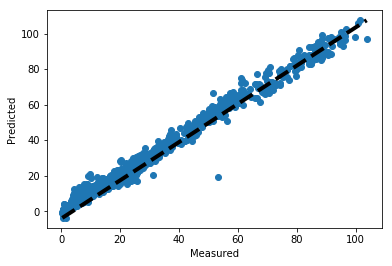

In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import regularizers
model = Sequential()  #层次模型
model.add(Dense(24,input_dim=len(features),init='uniform'))
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(1,input_dim=24))  #输出层
model.compile(loss='mean_squared_error', optimizer='sgd') #编译模型
# 训练
#记录训练开始时间
time_start = time.clock()
model.fit(X_train, y_train, nb_epoch = 1000, batch_size = 20) #训练模型1000次
#记录训练结束时间
time_end = time.clock()
print('Running time: %s Seconds'%(time_end -time_start))

# 预测
res = model.predict(X_test)
y_pred = []
for i in range(len(res)):
    y_pred.append(res[i][0])
#评估
utils.evaluate(y_test, y_pred)

#可视化
utils.visualize(y_test, y_pred)

In [37]:
# y_pred = model.predict(X)
# data_proced['bpr'] = y_pred

In [38]:
data_proced.to_csv('./energy_predict_data/predict_result/data_pre_%d.csv' % type, index = False)